## Word Cloud 

For this project, you'll create a "word cloud" from a text by writing a script. This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words. A dictionary is the output of the calculate_frequencies function. The wordcloud module will then generate the image from your dictionary.

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\shaha\anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\shaha\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\shaha\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\shaha\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


Important!!
If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above, select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.

To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Shakespears.txt` (197.12 kB)


In [5]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just","so","for","in"]
    
    # LEARNER CODE START HERE
    file_contents = file_contents.lower().split()
    freq = {}
    for word in file_contents:
        if word.isalpha():
            if word not in uninteresting_words:
                if word not in freq:
                    freq[word] = 0
                freq[word] += 1
            
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(freq)
    return cloud.to_array()

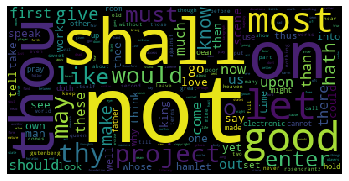

In [6]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()